# Traffic-Ticket Data

Exploratory analysis of over 6 million traffic-tickets from 2014-2017

- [Data overview and cleaning](#Data-overview-and-cleaning)
    - [Columns](#Columns)   
    - [Remove garbage values](#Remove-garbage-values)
    - [Fix mixed types error](#Fix-mixed-types-error)
- [Top 10 Traffic Violations](#Top-10-Traffic-Violations)
- [Traffic Violations by Gender](#Traffic-Violations-by-Gender)
- [Traffic Violations by Age](#Traffic-Violations-by-Age)
    - [Senior Citizens](#Senior-Citizens)
        - [Senior Citizens in New York](#Senior-citizens-in-New-York)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
traffic_tickets = pd.read_csv('./Traffic_Tickets_Issued__Four_Year_Window.csv')

C:\Users\dacrands\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*This error will be addressed in the next section*

## Data overview and cleaning

In [3]:
"Total rows: {:,}".format(len(traffic_tickets))

'Total rows: 6,298,032'

### Columns

View dframe columns

In [4]:
for col in traffic_tickets.columns:
    print(col + "\r")

Violation Charged Code
Violation Description
Violation Year
Violation Month
Violation Day of Week
Age at Violation
Gender
State of License
Police Agency
Court
Source


Create new dframe with cols of interest

In [5]:
traffic_tickets = traffic_tickets[[
    "Violation Description", 
    "Violation Year", 
    "Violation Month",
    "Violation Day of Week", 
    "Age at Violation", 
    "State of License", 
    "Gender",
]]

traffic_tickets.columns

Index(['Violation Description', 'Violation Year', 'Violation Month',
       'Violation Day of Week', 'Age at Violation', 'State of License',
       'Gender'],
      dtype='object')

Create shorter col names

In [6]:
traffic_tickets = traffic_tickets.rename(columns={
    'Violation Description': 'Violation', 
    'Violation Year': 'Year', 
    'Violation Month': 'Month', 
    'Violation Day of Week': 'Day',
    'Age at Violation': 'Age', 
    'State of License': 'State'
})

traffic_tickets.columns

Index(['Violation', 'Year', 'Month', 'Day', 'Age', 'State', 'Gender'], dtype='object')

### Remove garbage values

In [7]:
traffic_tickets.head()

,Violation,Year,Month,Day,Age,State,Gender
0,UNINSPECTED MOTOR VEHICLE,2016,3.0,TUESDAY,21.0,NEW YORK,M
1,SPEED OVER 55 ZONE,2016,3.0,SATURDAY,18.0,NEW YORK,F
2,SPEED OVER 55 ZONE,2016,2.0,WEDNESDAY,55.0,NEW YORK,M
3,SPEED IN ZONE,2016,2.0,SUNDAY,41.0,NEW YORK,M
4,SPEED OVER 55 ZONE,2016,1.0,THURSDAY,25.0,NEW YORK,M


In [8]:
traffic_tickets.tail()

,Violation,Year,Month,Day,Age,State,Gender
6298027,OPER MV WHILE USING PORTABLE ELEC DEV,20{,NaN,NaN,NaN,NaN,NaN
6298028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298031,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create new dframe sans the trailing garbage values

In [9]:
traffic_tickets = traffic_tickets[:6298027]

traffic_tickets.tail()

,Violation,Year,Month,Day,Age,State,Gender
6298022,OPERATING MV MOBILE PHONE,2017,8.0,MONDAY,29.0,NEW YORK,M
6298023,PLATE MISSING/INSECURE/DIRTY,2017,8.0,MONDAY,46.0,NEW YORK,M
6298024,DISOBEYED TRAFFIC DEVICE,2017,8.0,MONDAY,22.0,MARYLAND,M
6298025,IMPROPER SIGNAL,2017,8.0,MONDAY,36.0,NEW JERSEY,M
6298026,COM VEH ON PKWAY NYC,2017,8.0,MONDAY,42.0,NEW YORK,M


### Fix mixed types error 

Address `DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False`

In [10]:
traffic_ticket_sets = {}
for col in traffic_tickets.columns:
    traffic_ticket_sets[col] = set(traffic_tickets[col])

traffic_ticket_sets.keys()

dict_keys(['Violation', 'Year', 'Month', 'Day', 'Age', 'State', 'Gender'])

In [11]:
for key in traffic_ticket_sets.keys():
    print("{0}: {1}".format(
        key,
        set([type(i) for i in traffic_ticket_sets[key]])))

Violation: {<class 'str'>}
Year: {<class 'int'>, <class 'str'>}
Month: {<class 'numpy.float64'>}
Day: {<class 'str'>}
Age: {<class 'numpy.float64'>}
State: {<class 'str'>, <class 'float'>}
Gender: {<class 'str'>}


So it seems the cols containing mixed-types are `Year` and `State`. Let's fix that.

In [12]:
traffic_ticket_sets["Year"]

{2016, 2017, '2017', 2014, 2015}

In [13]:
traffic_tickets = traffic_tickets.replace(to_replace="2017", value=2017)

In [14]:
set(traffic_tickets.Year)

{2014, 2015, 2016, 2017}

In [15]:
len(traffic_ticket_sets["State"])

78

In [16]:
traffic_ticket_sets["State"]

{nan,
 'INDIANA',
 'COLORADO',
 'NEW HAMPSHIRE',
 'PENNSYLVANIA',
 'OHIO',
 'MISSOURI',
 'ARKANSAS',
 'IDAHO',
 'NUNAVUT CANADA',
 'KANSAS',
 'MINNESOTA',
 'UNKNOWN',
 'ONTARIO CANADA',
 'NEW JERSEY',
 'SASKATCHEWAN CANADA',
 'FOREIGN LICENSE',
 'QUEBEC CANADA',
 'TENNESSEE',
 'RHODE ISLAND',
 'NEWFOUNDLAND CANADA',
 'NORTH CAROLINA',
 'MARYLAND',
 'PUERTO RICO',
 'DISTRICT OF COLUMBIA',
 'US GOVERNMENT',
 'AMERICAN SAMOA',
 'HAWAII',
 'ARIZONA',
 'SOUTH DAKOTA',
 'SOUTH CAROLINA',
 'WISCONSIN',
 'DELAWARE',
 'ALABAMA',
 'WYOMING',
 'ARMED FORCES AMERICA',
 'NEW YORK',
 'TEXAS',
 'UTAH',
 'PANAMA',
 'ILLINOIS',
 'IOWA',
 'PRINCE EDWARD ISLAND CANADA',
 'BRITISH COLUMBIA CANADA',
 'INTERNATIONAL LICENSE',
 'NEW BRUNSWICK CANADA',
 'WEST VIRGINIA',
 'VERMONT',
 'NORTH DAKOTA',
 'WASHINGTON',
 'VIRGIN ISLANDS',
 'NEBRASKA',
 'OKLAHOMA',
 'NORTHWEST TERRITORIES CANADA',
 'NOVA SCOTIA CANADA',
 'MEXICO',
 'NEW MEXICO',
 'ARMED FORCES',
 'NEVADA',
 'GEORGIA',
 'VIRGINIA',
 'LOUISIANA',
 'US 

List of states provided by:
    
[List of states repo](https://gist.github.com/iamjason/8f8f4bc00c13de86bcad)

In [17]:
states = ["Alaska",
          "Alabama",
          "Arkansas",
          "American Samoa",
          "Arizona",
          "California",
          "Colorado",
          "Connecticut",
          "District of Columbia",
          "Delaware",
          "Florida",
          "Georgia",
          "Guam",
          "Hawaii",
          "Iowa",
          "Idaho",
          "Illinois",
          "Indiana",
          "Kansas",
          "Kentucky",
          "Louisiana",
          "Massachusetts",
          "Maryland",
          "Maine",
          "Michigan",
          "Minnesota",
          "Missouri",
          "Mississippi",
          "Montana",
          "North Carolina",
          "North Dakota",
          "Nebraska",
          "New Hampshire",
          "New Jersey",
          "New Mexico",
          "Nevada",
          "New York",
          "Ohio",
          "Oklahoma",
          "Oregon",
          "Pennsylvania",
          "Puerto Rico",
          "Rhode Island",
          "South Carolina",
          "South Dakota",
          "Tennessee",
          "Texas",
          "Utah",
          "Virginia",
          "Virgin Islands",
          "Vermont",
          "Washington",
          "Wisconsin",
          "West Virginia",
          "Wyoming"]

states = [s.upper() for s in states]

In [19]:
weird_states = [col_state for col_state in traffic_ticket_sets["State"] if
                    str(col_state) not in [fifty_state for fifty_state in states]]

print("Showing {0} weird states: \n".format(len(weird_states)))
for i, ws in enumerate(weird_states):
    print(i, ws)

Showing 23 weird states: 

0 nan
1 NUNAVUT CANADA
2 UNKNOWN
3 ONTARIO CANADA
4 SASKATCHEWAN CANADA
5 FOREIGN LICENSE
6 QUEBEC CANADA
7 NEWFOUNDLAND CANADA
8 US GOVERNMENT
9 ARMED FORCES AMERICA
10 PANAMA
11 PRINCE EDWARD ISLAND CANADA
12 BRITISH COLUMBIA CANADA
13 INTERNATIONAL LICENSE
14 NEW BRUNSWICK CANADA
15 NORTHWEST TERRITORIES CANADA
16 NOVA SCOTIA CANADA
17 MEXICO
18 ARMED FORCES
19 US FOREIGN DIPLOMATS
20 MANITOBA
21 YUKON TERRITORY CANADA
22 ALBERTA CANADA


In [20]:
traffic_tickets = traffic_tickets[~traffic_tickets.State.isin(weird_states)]

In [21]:
set(traffic_tickets.State)

{nan,
 'INDIANA',
 'COLORADO',
 'NEW HAMPSHIRE',
 'PENNSYLVANIA',
 'OHIO',
 'MISSOURI',
 'ARKANSAS',
 'IDAHO',
 'KANSAS',
 'MINNESOTA',
 'NEW JERSEY',
 'TENNESSEE',
 'RHODE ISLAND',
 'NORTH CAROLINA',
 'MARYLAND',
 'PUERTO RICO',
 'DISTRICT OF COLUMBIA',
 'AMERICAN SAMOA',
 'HAWAII',
 'ARIZONA',
 'SOUTH DAKOTA',
 'SOUTH CAROLINA',
 'WISCONSIN',
 'DELAWARE',
 'ALABAMA',
 'WYOMING',
 'NEW YORK',
 'TEXAS',
 'UTAH',
 'ILLINOIS',
 'IOWA',
 'WEST VIRGINIA',
 'VERMONT',
 'NORTH DAKOTA',
 'WASHINGTON',
 'VIRGIN ISLANDS',
 'NEBRASKA',
 'OKLAHOMA',
 'NEW MEXICO',
 'NEVADA',
 'GEORGIA',
 'VIRGINIA',
 'LOUISIANA',
 'GUAM',
 'MICHIGAN',
 'MASSACHUSETTS',
 'MAINE',
 'MONTANA',
 'FLORIDA',
 'MISSISSIPPI',
 'ALASKA',
 'CONNECTICUT',
 'KENTUCKY',
 'CALIFORNIA',
 'OREGON'}

In [23]:
traffic_tickets = traffic_tickets.dropna()

In [24]:
set(traffic_tickets.State)

{'ALABAMA',
 'ALASKA',
 'AMERICAN SAMOA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'GUAM',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'PUERTO RICO',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGIN ISLANDS',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING'}

In [25]:
len(set(traffic_tickets.State)) #magic num is 55

55

## Graph Config

In [26]:
SMALL_TEXT = 10
MEDIUM_TEXT = 12
LARGE_TEXT = 18

plt.style.use('seaborn')
plt.style.use('dark_background')

plt.rc('font', size=SMALL_TEXT)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_TEXT)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_TEXT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_TEXT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_TEXT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_TEXT)    # legend fontsize
plt.rc('figure', titlesize=LARGE_TEXT)  

## Top 10 Traffic Violations

In [27]:
top_10_violations = traffic_tickets \
                        .Violation \
                        .value_counts()[:10] 

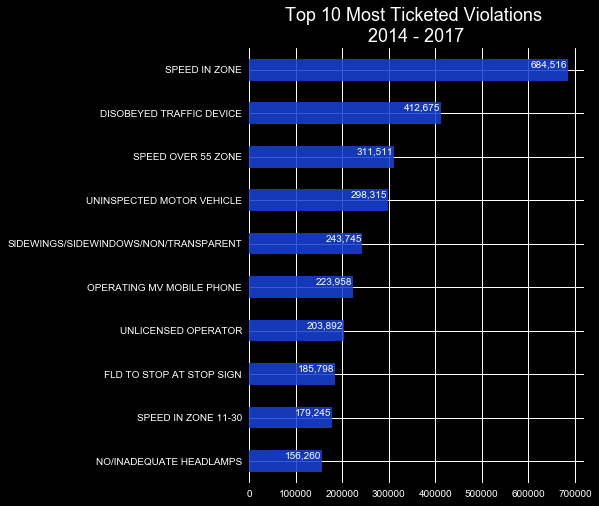

In [28]:
top_10_violations \
    .plot(kind="barh", figsize=(6,8), color="#1841d5de", title="Top 10 Most Ticketed Violations \n 2014 - 2017 ") \
    .invert_yaxis()
    
for i, v in enumerate(range(10)):
    plt.text(top_10_violations[i] - 80000, v-.05, '{:,}'.format(top_10_violations[i]))
    
plt.savefig("top-10-violations.png", bbox_inches="tight", pad_inches=0.2, dpi=120)

## Traffic Violations by Gender

In [29]:
traffic_tickets.Gender.value_counts()

M    4186645
F    1744887
Name: Gender, dtype: int64

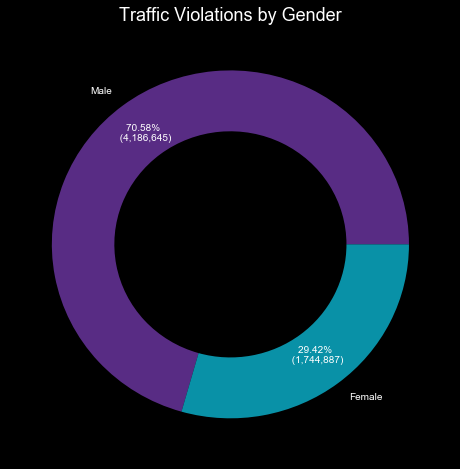

In [179]:
# Thanks https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
# for  `make_autopct()`
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n ({v:,})'.format(p=pct,v=val)
    return my_autopct

traffic_tickets \
    .Gender \
    .value_counts() \
    .plot(kind="pie", 
          figsize=(8,8), 
          wedgeprops=dict(width=0.35), 
          colors=["#663399de", "#0cb2cdd1"],
          labels=["Male", "Female"], 
          autopct=make_autopct(traffic_tickets.Gender.value_counts()),
          pctdistance=0.8,
          title="Traffic Violations by Gender") \
    .set_ylabel('')

plt.savefig("gender-pie.jpg", bbox_inches="tight", dpi=120, pad_inches=0.2)

In [72]:
top_male_violations = traffic_tickets.loc[traffic_tickets.Gender == "M"] \
                        .Violation \
                        .value_counts()[:10]
        
top_female_violations = traffic_tickets.loc[traffic_tickets.Gender == "F"] \
                        .Violation \
                        .value_counts()[:10]

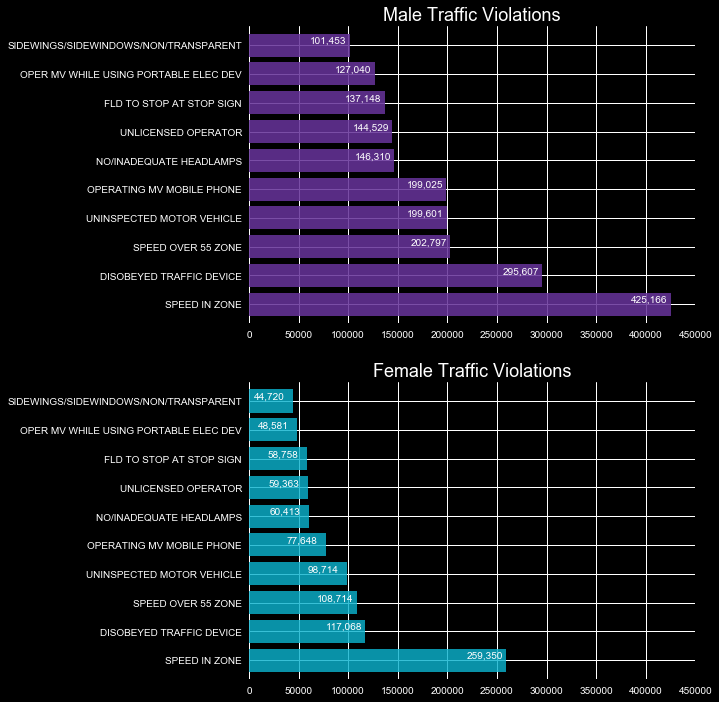

In [178]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(8, 12))

top_male_violations.plot(
    kind="barh", 
    ax=ax1, 
    width=0.8,
    title="Male Traffic Violations", 
    color="#663399de"
) 
ax1.invert_yaxis()
ax1.set_xlim(right=450000)

top_female_violations.plot(
    kind="barh", 
    ax=ax2, 
    width=0.8,
    title="Female Traffic Violations", 
    color="#0cb2cdd1"
) 
ax2.set_xlim(right=450000)

for i in range(10):
    ax1.text(top_male_violations[i] - 40000, i+.065, '{:,}'.format(top_male_violations[i]))
    ax2.text(top_female_violations[i] - 40000, i+.065, '{:,}'.format(top_female_violations[i]))

plt.savefig("gender-bar.jpg", bbox_inches="tight", pad_inches=0.2, dpi=240)

## Traffic Violations by Age

In [104]:
traffic_tickets.Age.describe().apply(lambda x: format(x, 'f'))

count    5931532.000000
mean          36.698954
std           13.903908
min           16.000000
25%           25.000000
50%           34.000000
75%           47.000000
max           95.000000
Name: Age, dtype: object

In [105]:
traffic_tickets.Age.median()

34.0

In [106]:
traffic_tickets.Age.mode()

0    24.0
dtype: float64

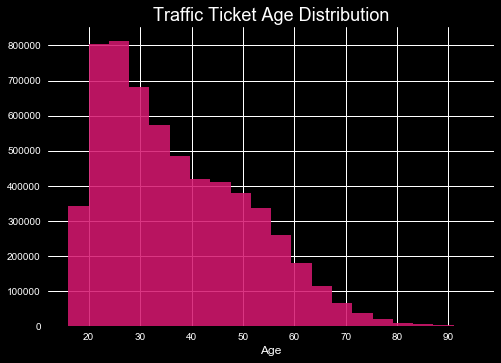

In [182]:
plt.hist(traffic_tickets.Age.dropna(), bins=20, color="#d5186fde")
plt.title("Traffic Ticket Age Distribution")
plt.xlabel("Age")

plt.savefig("age-dist.svg", bbox_inches="tight", pad_inches=0.2, dpi=200)

### Senior Citizens

In [195]:
senior_tickets = traffic_tickets[traffic_tickets.Age >= 65]

In [196]:
senior_tickets.describe()

,Year,Month,Age
count,215391.000000,215391.000000,215391.000000
mean,2015.523806,6.496604,70.443231
std,1.126189,3.306446,5.274218
min,2014.000000,1.000000,65.000000
25%,2015.000000,4.000000,66.000000
50%,2016.000000,6.000000,69.000000
75%,2017.000000,9.000000,73.000000
max,2017.000000,12.000000,95.000000


In [210]:
top_10_senior_violations = senior_tickets.Violation.value_counts()[:10]

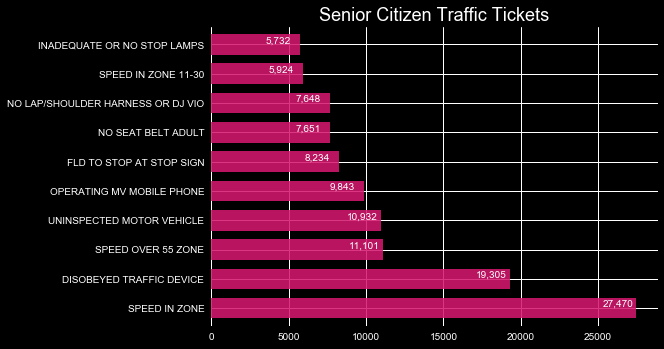

In [211]:
top_10_senior_violations.plot(kind="barh", title="Senior Citizen Traffic Tickets", width=0.7, color="#d5186fde")
for i, v in enumerate(top_10_senior_violations):
    plt.text(v - 2200, i+.05, '{:,}'.format(v))

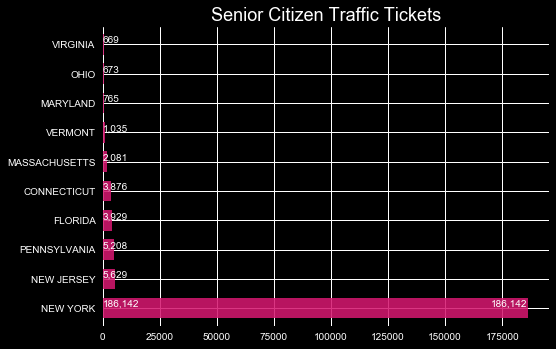

In [191]:
senior_tickets.State.value_counts()[:10].plot(kind="barh", title="Senior Citizen Traffic Tickets", width=0.7, color="#d5186fde")
for i, v in enumerate(senior_tickets.State.value_counts()[:10]):
    plt.text(0, i+.05, '{:,}'.format(v))

plt.text(senior_tickets.State.value_counts()[0] - 16000, 0+.05, '{:,}'.format(senior_tickets.State.value_counts()[0]))

#### Senior-citizens in New York

In [188]:
total_senior_tickets = len(senior_tickets)
total_ny_senior_tickets = senior_tickets.State.value_counts()['NEW YORK']

print("Total Senior Tickets: {0:,} \n \
    \rTotal NY Senior Tickets: {1:,} \n \
    \rSenior Tickets Outside NY: {2:,} \n".format(
    total_senior_tickets,
    total_ny_senior_tickets,
    total_senior_tickets - total_ny_senior_tickets
))

print("{0}% of tickets issued to senior-citizens in the United States come from New York.".format(
    round(total_ny_senior_tickets / total_senior_tickets * 100, 2)
))

Total Senior Tickets: 215,391 
Total NY Senior Tickets: 186,142 
Senior Tickets Outside NY: 29,249 

86.42% of tickets issued to senior-citizens in the United States come from New York.


In [123]:
senior_tickets[senior_tickets.State == 'NEW YORK'].Violation.value_counts()[:10]

SPEED IN ZONE                        20814
DISOBEYED TRAFFIC DEVICE             16601
UNINSPECTED MOTOR VEHICLE            10666
OPERATING MV MOBILE PHONE             8405
SPEED OVER 55 ZONE                    8216
FLD TO STOP AT STOP SIGN              7653
NO LAP/SHOULDER HARNESS OR DJ VIO     6645
NO SEAT BELT ADULT                    6608
INADEQUATE OR NO STOP LAMPS           5351
SPEED IN ZONE 11-30                   4703
Name: Violation, dtype: int64

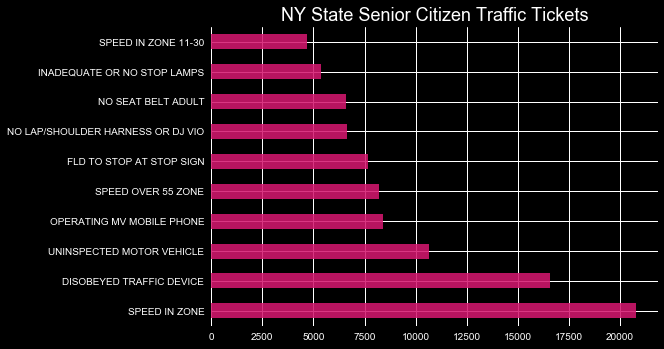

In [136]:
senior_tickets[senior_tickets.State == 'NEW YORK'] \
    .Violation \
    .value_counts()[:10] \
    .plot(kind="barh", title="NY State Senior Citizen Traffic Tickets", color="#d5186fde")